In [1]:
# We present EXPERIMENTS to demonstrate that MACHINE LEARNING MODELS "CANNOT EXTRAPOLATE".....ie., they can "ONLY REPRODUCE WHAT THEY HAVE
# ALREADY SEEN on the KIND OF INPUT THEY HAVE ALREADY SEEN". We present results of these experiments with (1) SUPPORT VECTOR MACHINES,
# (2) RANDOM FOREST and (3) DEEPLEARNING MODEL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # 1000 two dimensional random samples from uniform distribution (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # This implements the function y = cos(2*x1) + cos(3*x2)

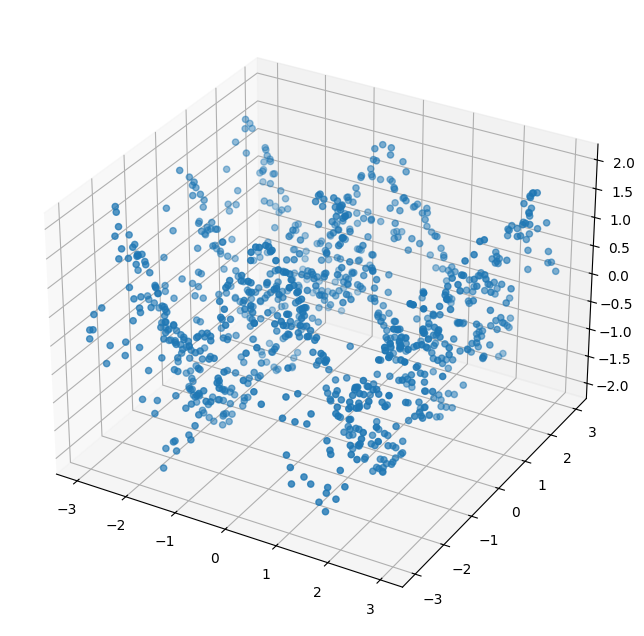

In [4]:
# Plot the true function scatter plot
# Now actual function plot is for 1000 two dimensional random samples from uniform distribution (-3, +3)
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [5]:
# SVR
model = SVR(C=100.) # here C is the TUNING PARAMETER
model.fit(X, Y);

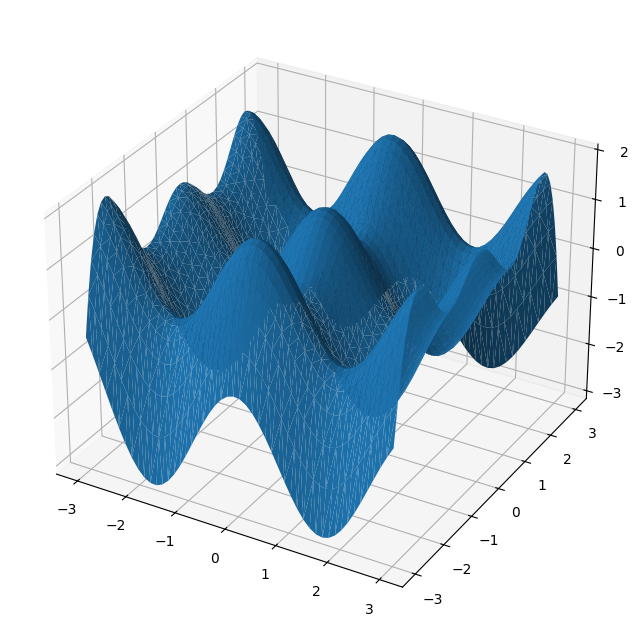

In [6]:
# surface plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat3 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat3, linewidth=0.2, antialiased=True);

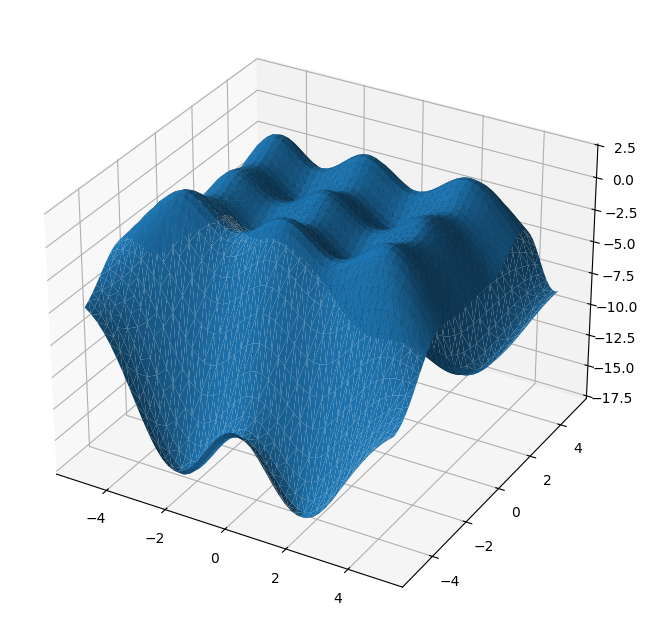

In [7]:
# Can it extrapolate?
# Plot the prediction surface plot
#...while model prediction plot is for EQUALLY SPACED x1&x2 in [-5,5]
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat5 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat5, linewidth=0.2, antialiased=True)
plt.show()

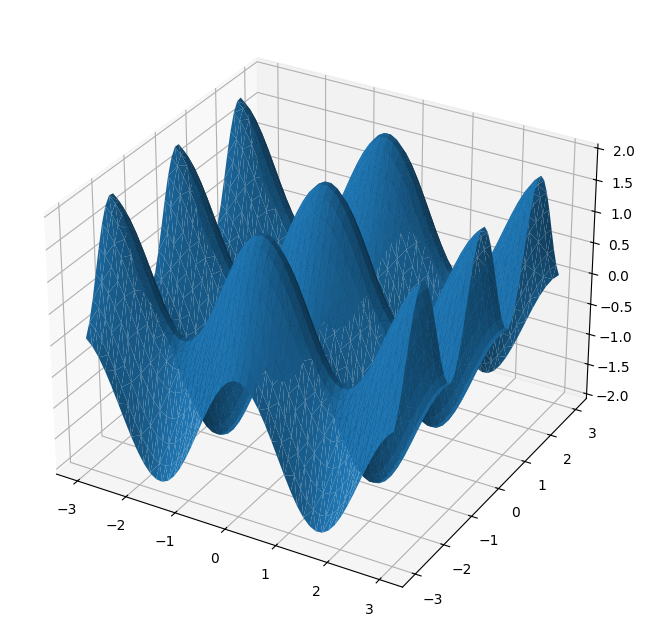

In [8]:
# What the true function looks like
# NOTE: TRUE FUNCTION is plotted against EQUALLY SPACED x1&x2 in [-3,3] and NOT
# x1&x2 from 2-d random samples from uniformly distributed (-3,3) distribution
# like in SCATTER PLOT

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue3 = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) ### the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue3, linewidth=0.2, antialiased=True)
plt.show()

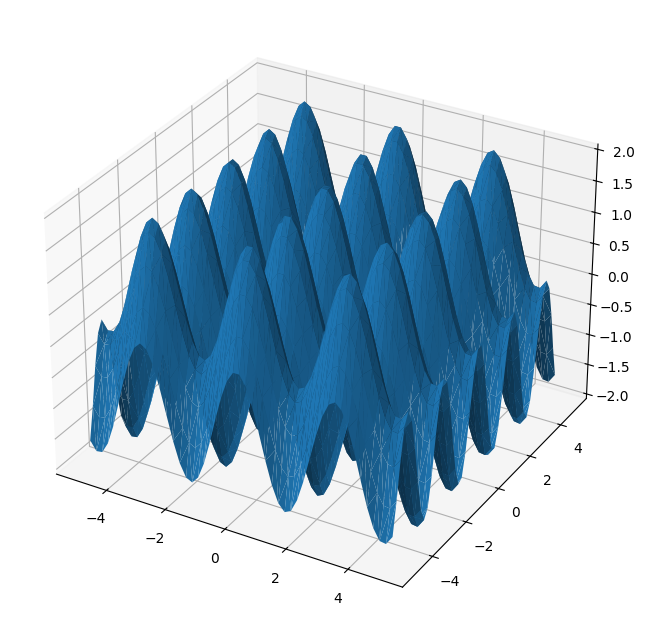

In [9]:
# What the true function looks like
# NOTE: TRUE FUNCTION is plotted against EQUALLY SPACED x1&x2 in [-5,5] and NOT
# x1&x2 from 2-d random samples from uniformly distributed (-3,3) distribution
# like in SCATTER PLOT

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue5 = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) ### the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue5, linewidth=0.2, antialiased=True)
plt.show()

In [10]:
# Note the true function is CLEARLY BOUNDED IN [-2,2] being the sum of 2 cosine terms
# SUPPORT VECTOR MACHINE is NOT ABLE to LEARN THIS RANGE OF BOUNDEDNESS even for training set as Yhat_min = -3.06 & Yhat_max = 2.00
# for x1&x2 in [-3,3]. The problem becomes way worse when we TRY TO EXTRAPOLATE. Now Yhat_min = -17.31 and Yhat_max = 2.18 for x1&x2
# in [-5,5]
rmse5 = np.sqrt(np.mean((Ytrue5 - Yhat5)**2))
rmse3 = np.sqrt(np.mean((Ytrue3 - Yhat3)**2))
print("Prediction error for trained set is: ", rmse3)
print("Prediction error for trained and Extrapolated set is: ", rmse5)
print("Max true function value in (-3,3) interval is : ",max(Ytrue3)," ","Min true function value in (-3,3) interval is : ",min(Ytrue3))
print("Max true function value in (-5,5) interval is : ",max(Ytrue5)," ","Min true function value in (-5,5) interval is : ",min(Ytrue5))
print("Max pred function value in (-3,3) interval is : ",max(Yhat3)," ","Min pred function value in (-3,3) interval is : ",min(Yhat3))
print("Max pred function value in (-5,5) interval is : ",max(Yhat5)," ","Min pred function value in (-5,5) interval is : ",min(Yhat5))

Prediction error for trained set is:  0.36652076608457435
Prediction error for trained and Extrapolated set is:  6.730099918425883
Max true function value in (-3,3) interval is :  1.9819625267035748   Min true function value in (-3,3) interval is :  -1.996588982519852
Max true function value in (-5,5) interval is :  1.9989429272345616   Min true function value in (-5,5) interval is :  -1.9946592941391297
Max pred function value in (-3,3) interval is :  2.0038214542887136   Min pred function value in (-3,3) interval is :  -3.061806599776917
Max pred function value in (-5,5) interval is :  2.178138970939859   Min pred function value in (-5,5) interval is :  -17.312656986082057


In [12]:
model = RandomForestRegressor()
model.fit(X, Y);

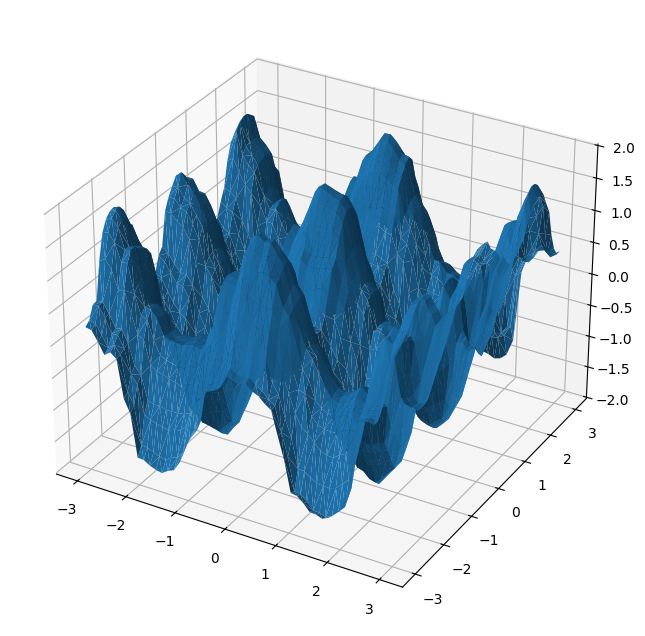

In [16]:
# surface plot
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat3 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat3, linewidth=0.2, antialiased=True);

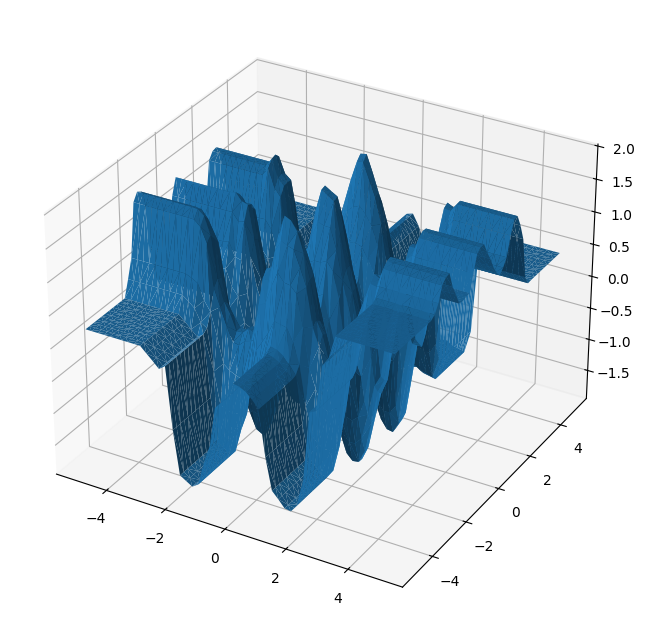

In [17]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat5 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat5, linewidth=0.2, antialiased=True)
plt.show()

In [20]:
'''
In case of RANDOM FOREST, the EXTRAPOLATION is the LAST PREDICTION in the training set (since RANDOM FOREST PREDICTS in "LINES and
HYPERPLANES". But this also means that UNLIKE SUPPORT VECTOR MACHINE, the extrapolation is likely to be WITHIN CORRECT BOUNDS.
'''
rmse5 = np.sqrt(np.mean((Ytrue5 - Yhat5)**2))
rmse3 = np.sqrt(np.mean((Ytrue3 - Yhat3)**2))
print("Prediction error for trained set is: ", rmse3)
print("Prediction error for trained and Extrapolated set is: ", rmse5)
print("Max true function value in (-3,3) interval is : ",max(Ytrue3)," ","Min true function value in (-3,3) interval is : ",min(Ytrue3))
print("Max true function value in (-5,5) interval is : ",max(Ytrue5)," ","Min true function value in (-5,5) interval is : ",min(Ytrue5))
print("Max pred function value in (-3,3) interval is : ",max(Yhat3)," ","Min pred function value in (-3,3) interval is : ",min(Yhat3))
print("Max pred function value in (-5,5) interval is : ",max(Yhat5)," ","Min pred function value in (-5,5) interval is : ",min(Yhat5))

Prediction error for trained set is:  0.23383439643136575
Prediction error for trained and Extrapolated set is:  1.0004751313509361
Max true function value in (-3,3) interval is :  1.9819625267035748   Min true function value in (-3,3) interval is :  -1.996588982519852
Max true function value in (-5,5) interval is :  1.9989429272345616   Min true function value in (-5,5) interval is :  -1.9946592941391297
Max pred function value in (-3,3) interval is :  1.9401524989986023   Min pred function value in (-3,3) interval is :  -1.940519885799976
Max pred function value in (-5,5) interval is :  1.9499836757534417   Min pred function value in (-5,5) interval is :  -1.8766434387343711


In [21]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y);

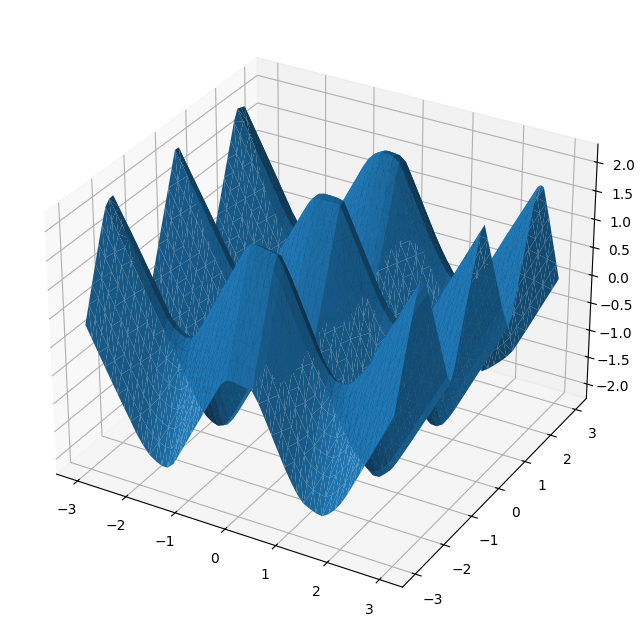

In [22]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat3 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat3, linewidth=0.2, antialiased=True);

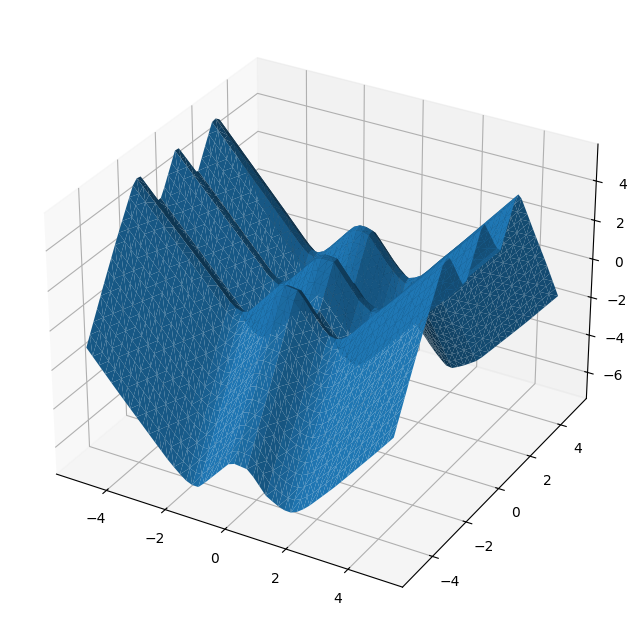

In [23]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat5 = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat5, linewidth=0.2, antialiased=True)
plt.show()

In [26]:
# Like the Support Vector Machine, the Deep Learning Model is also NOT ABLE to EXTRAPOLATE in CORRECT BOUND RANGE [-2,2] of true function
# It BREACHES BOUNDS MILDLY in training interval of (-3,3) but BREACHES BOUNDS WILDLY in extrapolated interval of (-5,5)
rmse5 = np.sqrt(np.mean((Ytrue5 - Yhat5)**2))
rmse3 = np.sqrt(np.mean((Ytrue3 - Yhat3)**2))
print("Prediction error for trained set is: ", rmse3)
print("Prediction error for trained and Extrapolated set is: ", rmse5)
print("Max true function value in (-3,3) interval is : ",max(Ytrue3)," ","Min true function value in (-3,3) interval is : ",min(Ytrue3))
print("Max true function value in (-5,5) interval is : ",max(Ytrue5)," ","Min true function value in (-5,5) interval is : ",min(Ytrue5))
print("Max pred function value in (-3,3) interval is : ",max(Yhat3)," ","Min pred function value in (-3,3) interval is : ",min(Yhat3))
print("Max pred function value in (-5,5) interval is : ",max(Yhat5)," ","Min pred function value in (-5,5) interval is : ",min(Yhat5))

Prediction error for trained set is:  0.09743816857831937
Prediction error for trained and Extrapolated set is:  2.835074703771499
Max true function value in (-3,3) interval is :  1.9819625267035748   Min true function value in (-3,3) interval is :  -1.996588982519852
Max true function value in (-5,5) interval is :  1.9989429272345616   Min true function value in (-5,5) interval is :  -1.9946592941391297
Max pred function value in (-3,3) interval is :  2.2237758186518355   Min pred function value in (-3,3) interval is :  -2.1795540055230083
Max pred function value in (-5,5) interval is :  5.592019578579886   Min pred function value in (-5,5) interval is :  -7.148561792366535


In [27]:
# STOCK PRICES: Here we demonstrate why AR models in case of stock prices WILL NOT WORK. The plot shows that x(t),x(t+1) tuple
# involves EXTRAPOLATION from TRAIN to TEST and we saw previously that MACHINE LEARNING MODELS CANNOT EXTRAPOLATE.

In [28]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2025-11-06 18:39:17--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.1s    

2025-11-06 18:39:17 (1.96 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [31]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [32]:
df.shape

(2263, 6)

In [33]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [34]:
Xtrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  Xtrain.append((x0, x1))

Xtest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  Xtest.append((x0, x1))

In [35]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

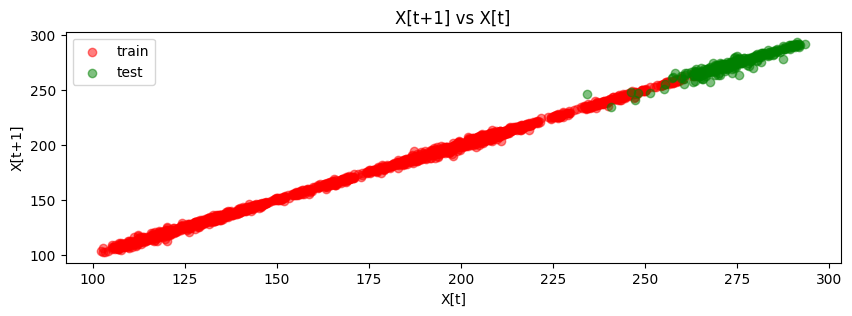

In [36]:
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test')
plt.legend();

In [28]:
# Exericse: if you believe that "min-max scaling" will help, try it
# (though it should be obvious why it yields the same result)